In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
auc_df = pd.read_excel('ave_rank.xlsx')
auc_df.index = auc_df['Method']
auc_df = auc_df.drop(['Method'], axis=1)
auc_df

,S,M,H,D
Method,,,,
JODIE-s,3,2,3,4
DyRep-s,12,11,14,14
TGN-s,6,5,6,9
JODIE-m,1,1,2,1
DyRep-m,13,12,13,12
TGN-m,5,4,7,7
JODIE-h,2,3,1,2
DyRep-h,14,13,11,13
TGN-h,8,7,5,6


In [4]:
auc = auc_df.to_numpy()
auc

array([[ 3,  2,  3,  4],
       [12, 11, 14, 14],
       [ 6,  5,  6,  9],
       [ 1,  1,  2,  1],
       [13, 12, 13, 12],
       [ 5,  4,  7,  7],
       [ 2,  3,  1,  2],
       [14, 13, 11, 13],
       [ 8,  7,  5,  6],
       [ 4,  6,  4,  3],
       [11, 14, 12, 11],
       [ 9, 10,  8,  5],
       [ 7,  8,  9,  8],
       [10,  9, 10, 10]])

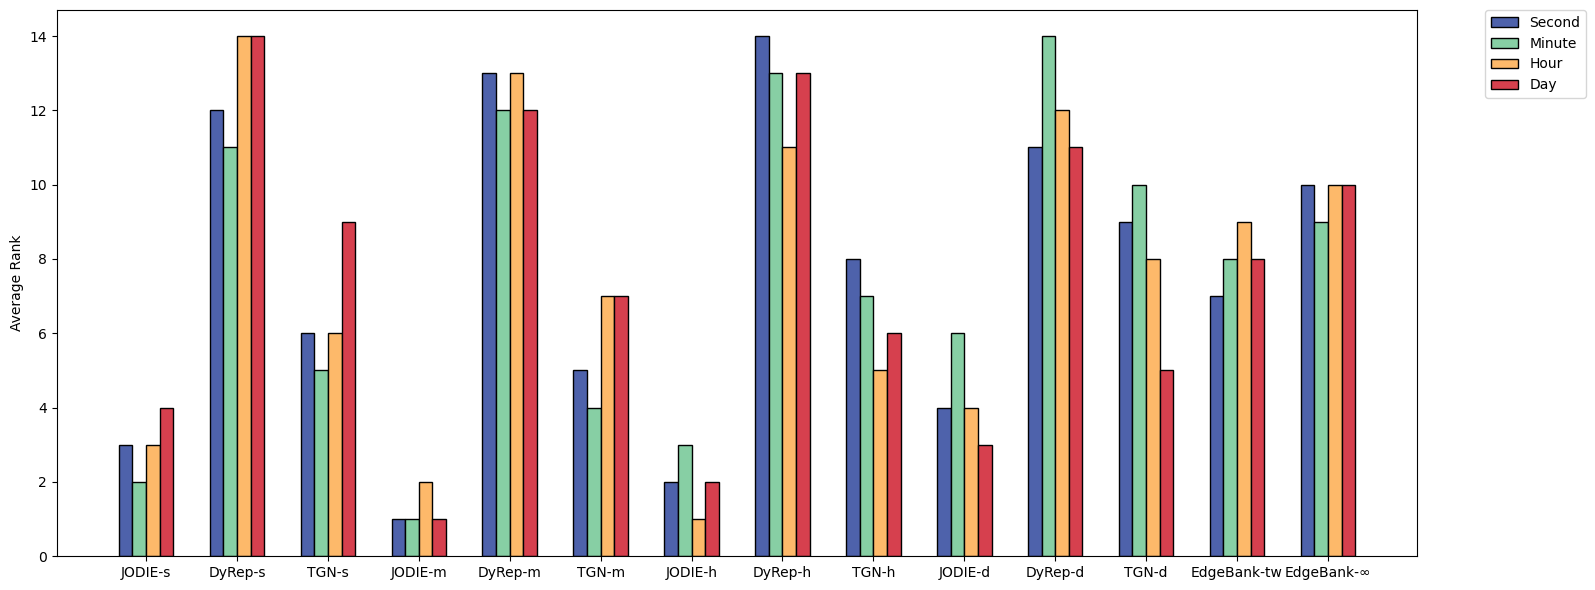

In [5]:
# model-wise plot
size = 14
x = np.arange(size)

auc_s = auc[:, 0]
auc_m = auc[:, 1]
auc_h = auc[:, 2]
auc_d = auc[:, 3]

total_width, n = 0.6, 4
width = total_width / n
x = x - (total_width - width) / 2

plt.figure(figsize=(16, 6))

plt.bar(x, auc_s, width=width, color='#4E62AB', edgecolor="black", label='Second')
plt.bar(x + width, auc_m, width=width, color='#87CFA4', edgecolor="black", label='Minute')
plt.bar(x + 2 * width, auc_h, width=width, color='#FDB96A', edgecolor="black", label='Hour')
plt.bar(x + 3 * width, auc_d, width=width, color='#D6404E', edgecolor="black", label='Day')

plt.xticks(x + 1.5 * width, auc_df.index, rotation=0)
plt.ylabel('Average Rank')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.tight_layout()
plt.savefig('./ave_rank.pdf')

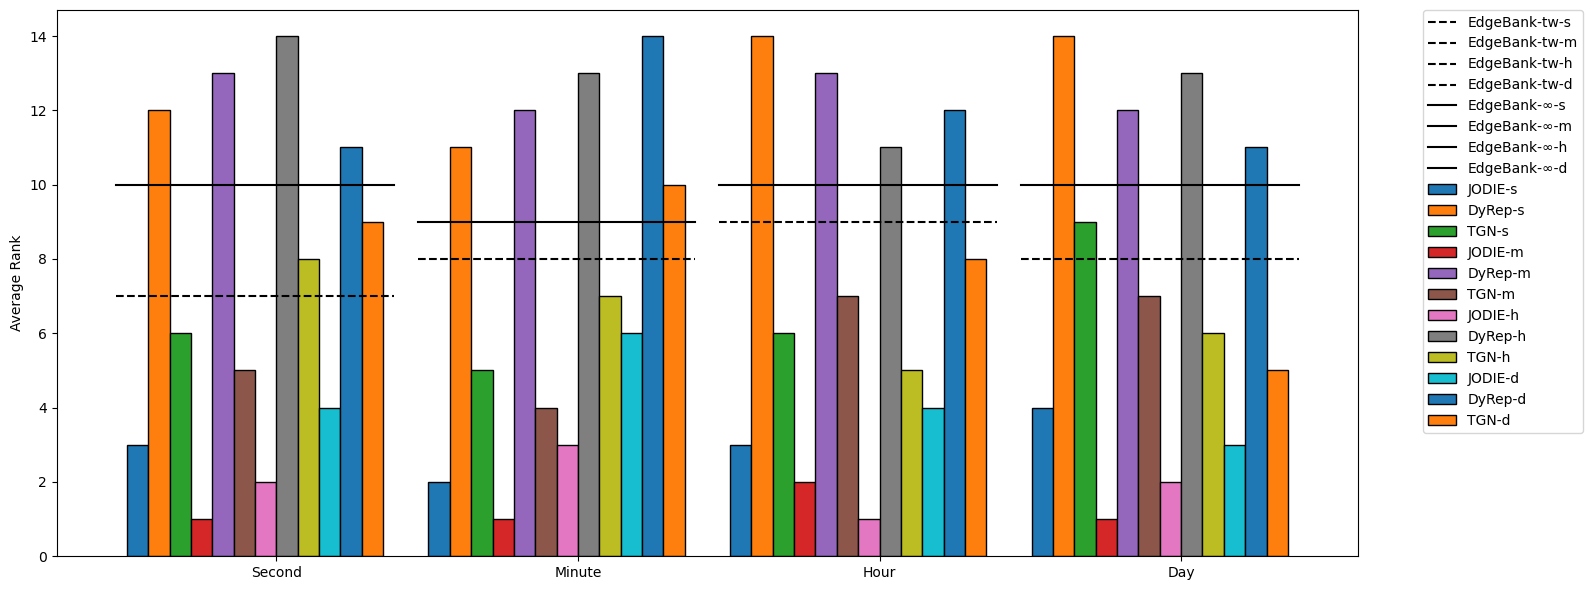

In [8]:
# granularity-wise plot
size = 4
num_method = 12
x = np.arange(size)

rank = auc.T

total_width, n = 0.85, num_method
width = total_width / n
x = x - (total_width - width) / 2

plt.figure(figsize=(16, 6))

plt.plot(np.linspace(x[0] - 1 * width, x[0] + num_method * width, 10), [rank[0, -2]] * 10, 'k--', label='EdgeBank-tw-s')
plt.plot(np.linspace(x[1] - 1 * width, x[1] + num_method * width, 10), [rank[1, -2]] * 10, 'k--', label='EdgeBank-tw-m')
plt.plot(np.linspace(x[2] - 1 * width, x[2] + num_method * width, 10), [rank[2, -2]] * 10, 'k--', label='EdgeBank-tw-h')
plt.plot(np.linspace(x[3] - 1 * width, x[3] + num_method * width, 10), [rank[3, -2]] * 10, 'k--', label='EdgeBank-tw-d')

plt.plot(np.linspace(x[0] - 1 * width, x[0] + num_method * width, 10), [rank[0, -1]] * 10, 'k-', label='EdgeBank-∞-s')
plt.plot(np.linspace(x[1] - 1 * width, x[1] + num_method * width, 10), [rank[1, -1]] * 10, 'k-', label='EdgeBank-∞-m')
plt.plot(np.linspace(x[2] - 1 * width, x[2] + num_method * width, 10), [rank[2, -1]] * 10, 'k-', label='EdgeBank-∞-h')
plt.plot(np.linspace(x[3] - 1 * width, x[3] + num_method * width, 10), [rank[3, -1]] * 10, 'k-', label='EdgeBank-∞-d')

for i in range(num_method):
    plt.bar(x + i * width, rank[:, i], width=width, edgecolor='black', label=auc_df.index[i])

plt.xticks(x + 6.5 * width, ['Second', 'Minute', 'Hour', 'Day'], rotation=0)
plt.ylabel('Average Rank')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.tight_layout()
plt.savefig('./ave_rank_granularity.pdf')